# Parkinson Disease Prediction

### 0. Introduction

Parkinson’s disease is a condition where a part of your brain deteriorates, causing more severe symptoms over time. While this condition is best known for how it affects muscle control, balance and movement, it can also cause a wide range of other effects on your senses, thinking ability, mental health and more.

##### How does it affect?
The risk of developing Parkinson’s disease naturally increases with age, and the average age at which it starts is 60 years old. It’s slightly more common in men and people assigned male at birth (AMAB) than in women and people assigned female at birth (AFAB).

While Parkinson’s disease is usually age-related, it can happen in adults as young as 20 (though this is extremely rare, and often people have a parent, full sibling or child with the same condition).

##### How common is this condition?
Parkinson’s disease is very common overall, ranking second among age-related degenerative brain diseases. It’s also the most common motor (movement-related) brain disease. Experts estimate that it affects at least 1% of people over age 60 worldwide.

### 1. Data Description

Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR, HNR - Two measures of the ratio of noise to tonal components in the voice
- status - The health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE, D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

### 2. Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import QuantileTransformer
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB
import pickle

### 3. Data Collection and Analysis

##### 3.1 Importing the Data

In [2]:
df = pd.read_csv("E:\Multiple Disease Prediction\Datasets\parkinsons.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21764\2968927800.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("E:\Multiple Disease Prediction\Datasets\parkinsons.csv")


In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

##### 3.2 Missing Values

In [8]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

##### 3.3 Duplicate Values

In [9]:
df.duplicated().sum()

0

##### 3.4 Normalization

In [10]:
for feature in df.columns:
    print(feature, len(df[feature].unique()))

name 195
MDVP:Fo(Hz) 195
MDVP:Fhi(Hz) 195
MDVP:Flo(Hz) 195
MDVP:Jitter(%) 173
MDVP:Jitter(Abs) 19
MDVP:RAP 155
MDVP:PPQ 165
Jitter:DDP 180
MDVP:Shimmer 188
MDVP:Shimmer(dB) 149
Shimmer:APQ3 184
Shimmer:APQ5 189
MDVP:APQ 189
Shimmer:DDA 189
NHR 185
HNR 195
status 2
RPDE 195
DFA 195
spread1 195
spread2 194
D2 195
PPE 195


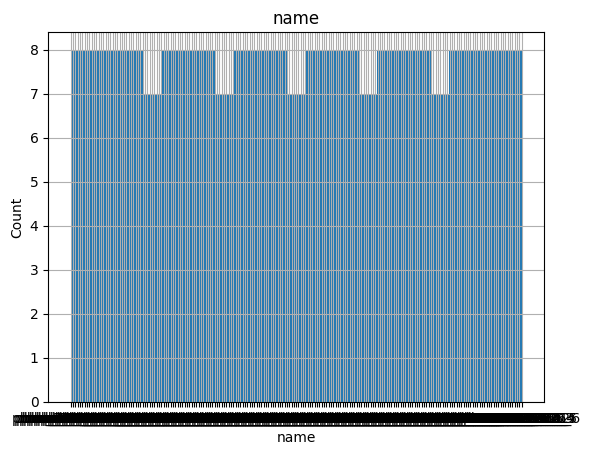

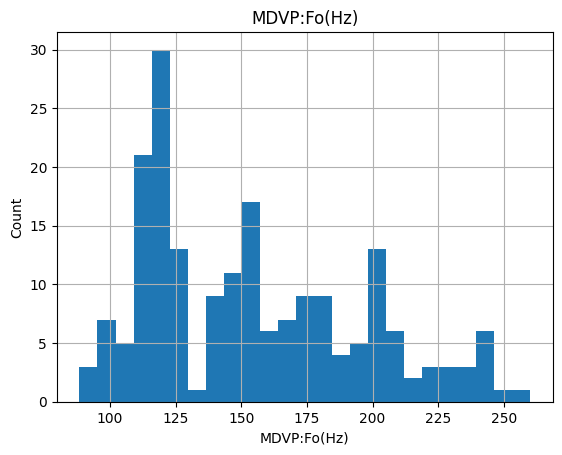

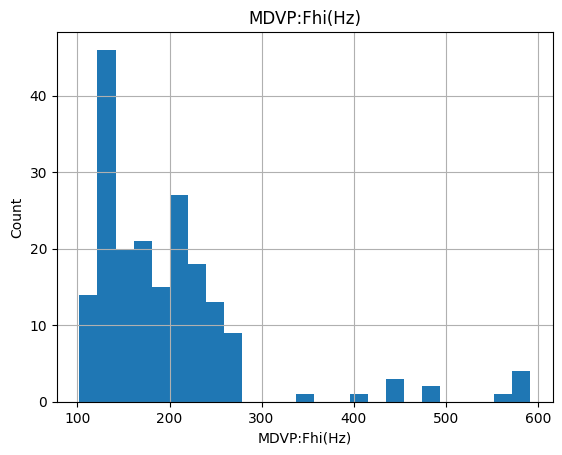

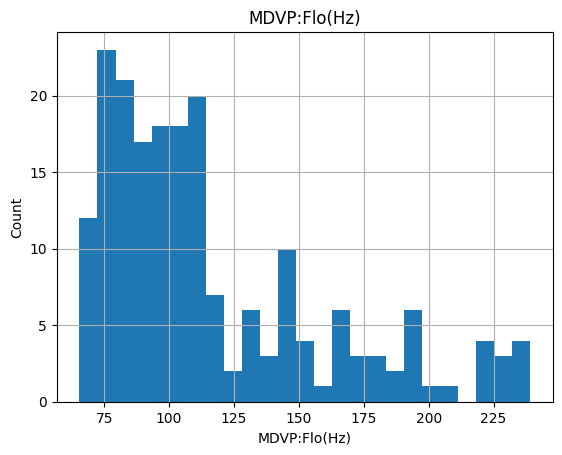

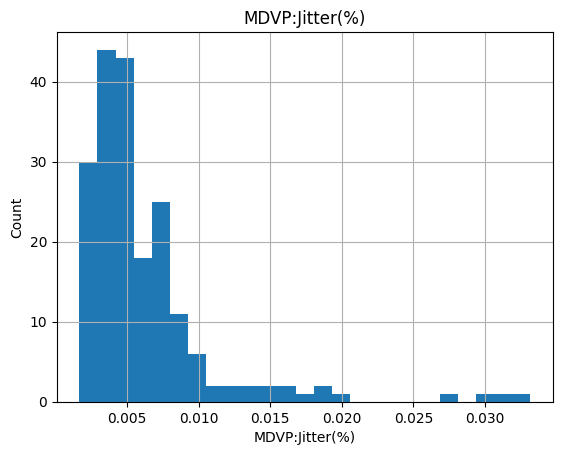

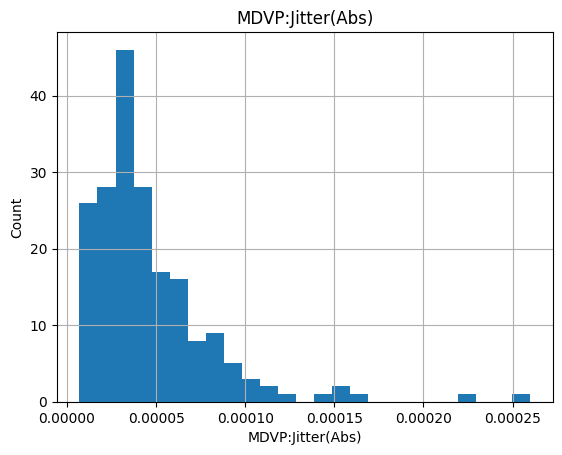

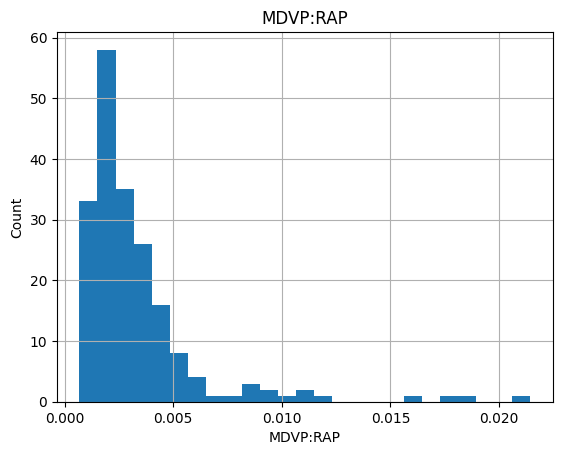

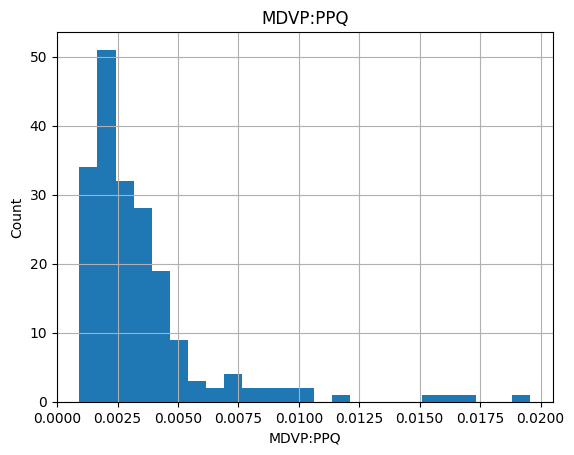

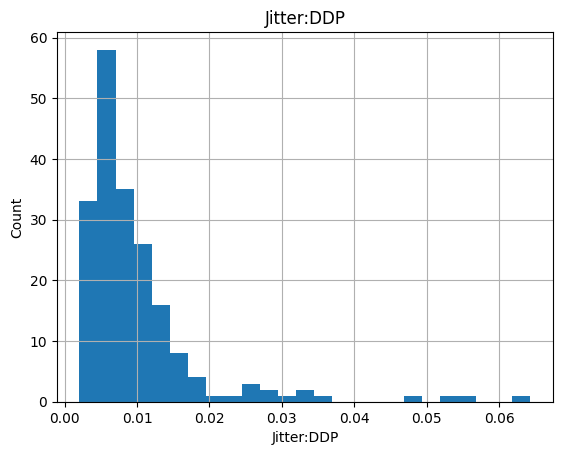

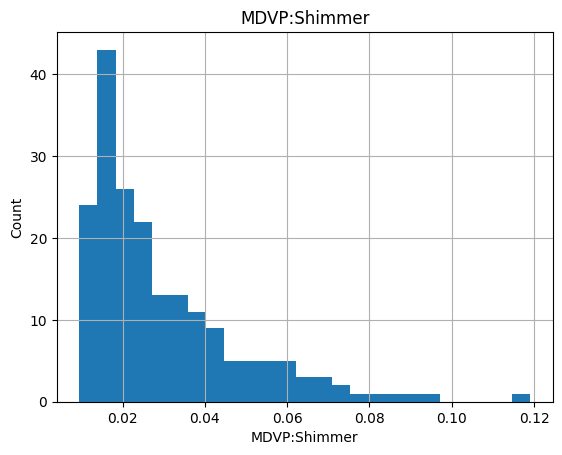

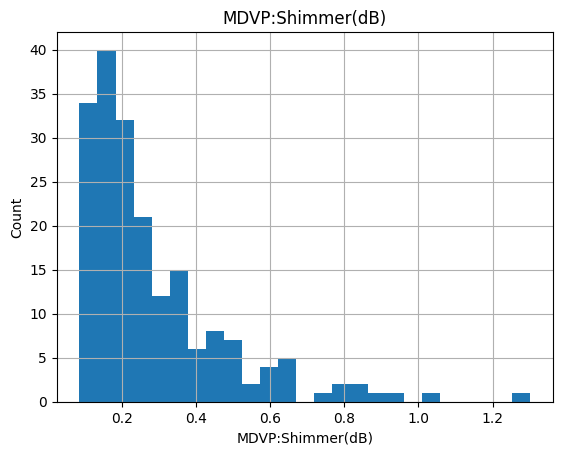

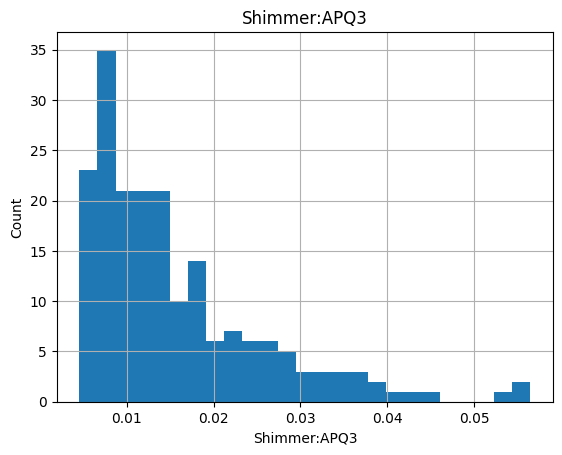

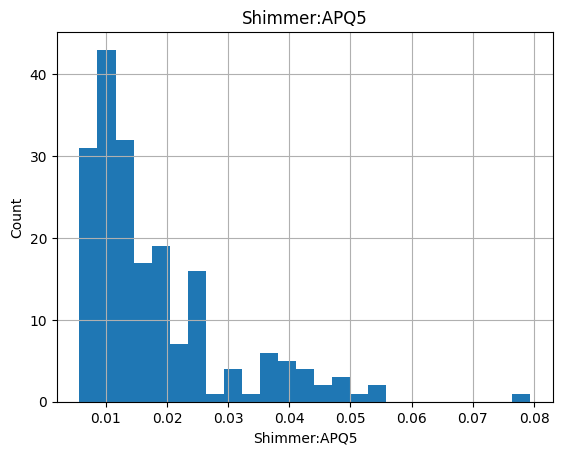

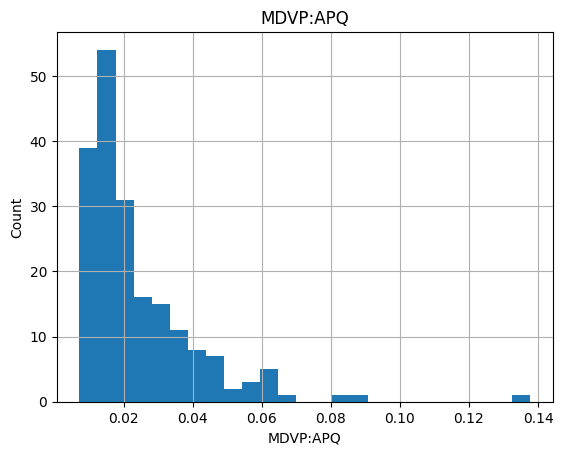

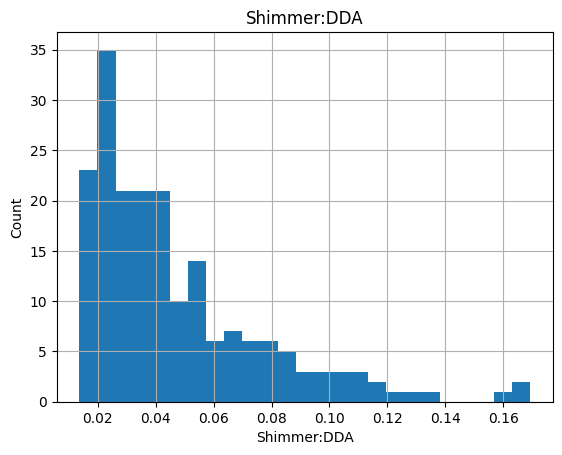

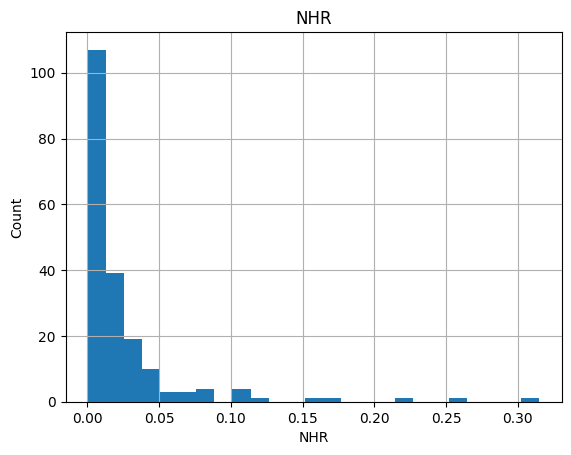

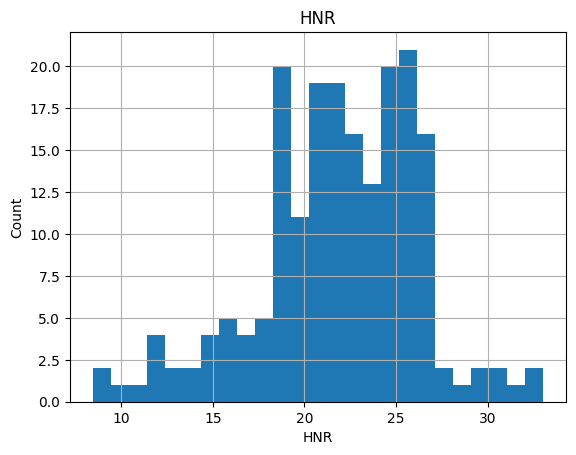

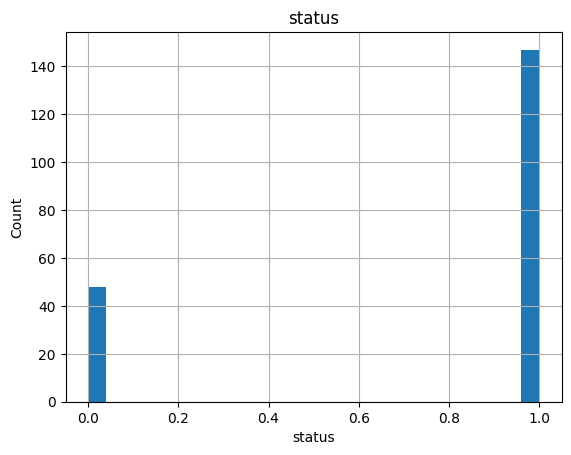

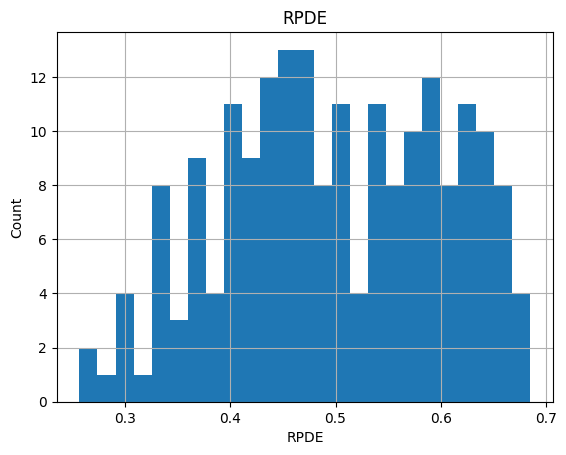

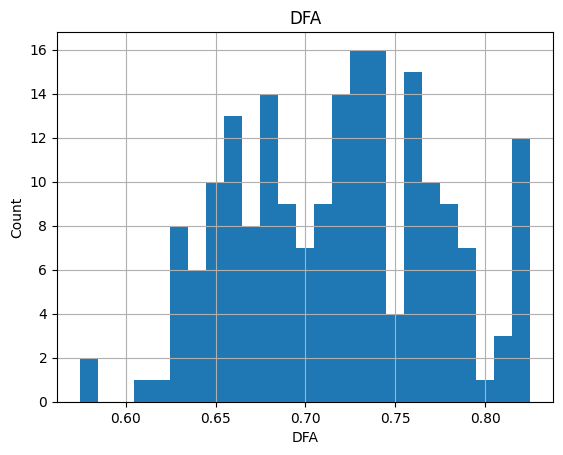

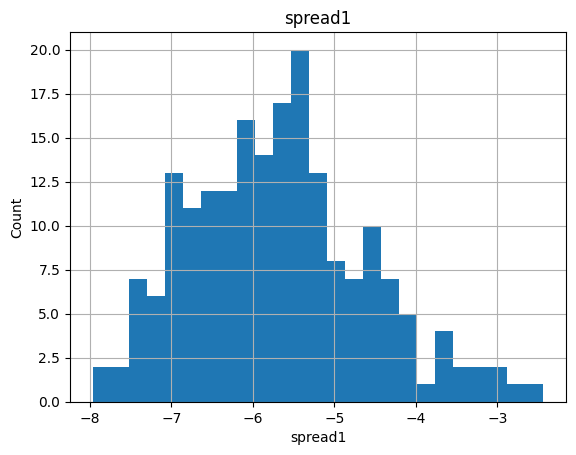

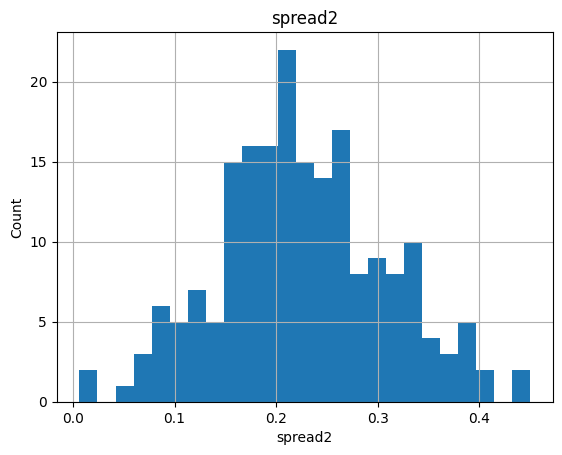

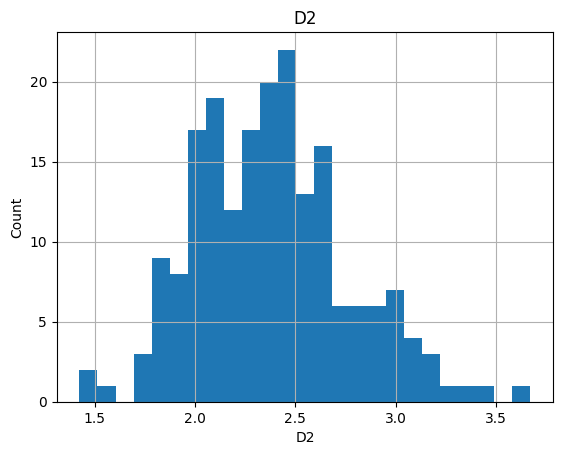

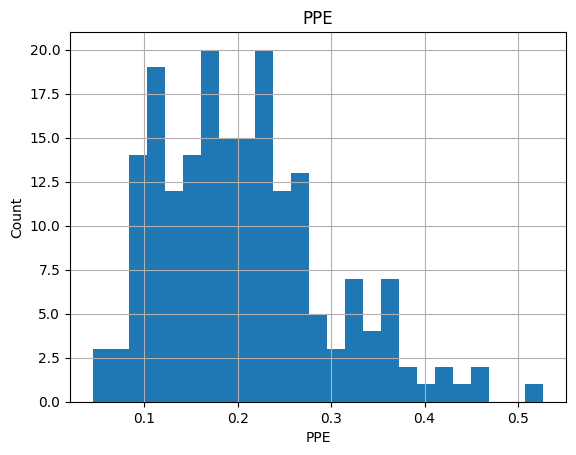

In [11]:
for feature in df.columns:
    df[feature].hist(bins=25)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


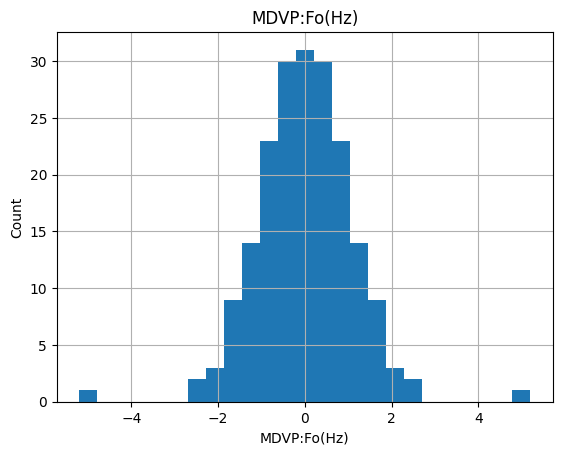

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


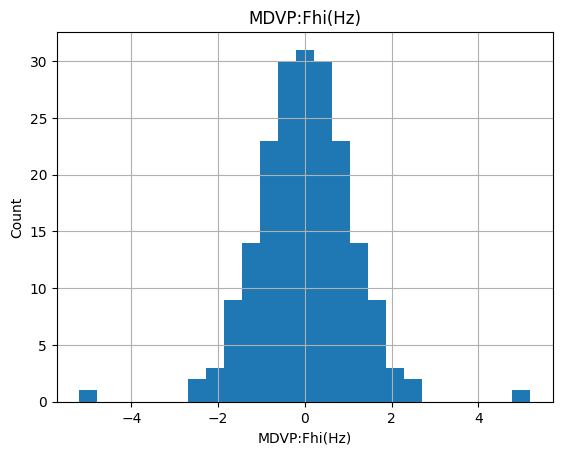

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


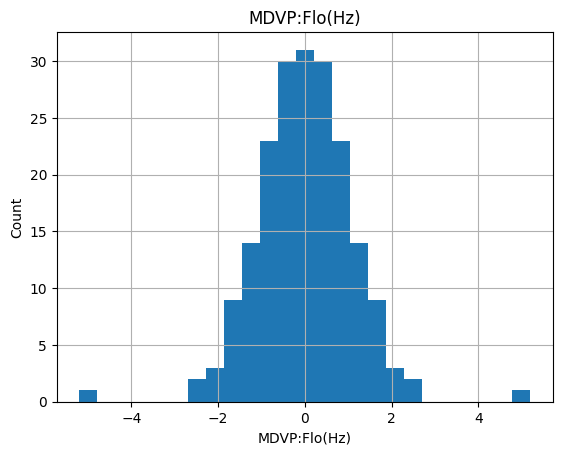

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


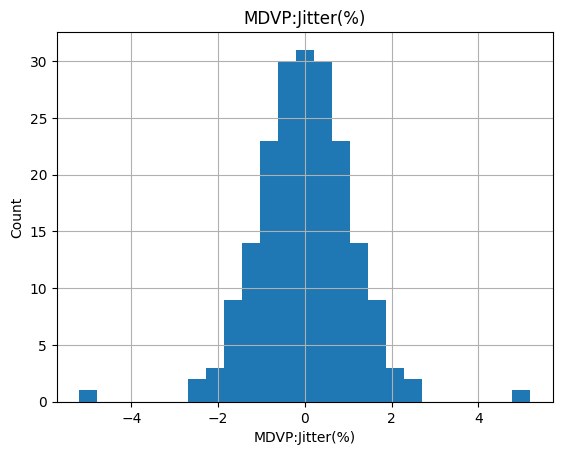

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


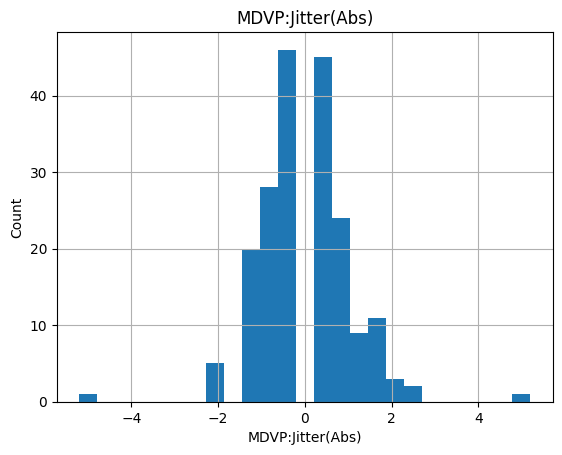

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


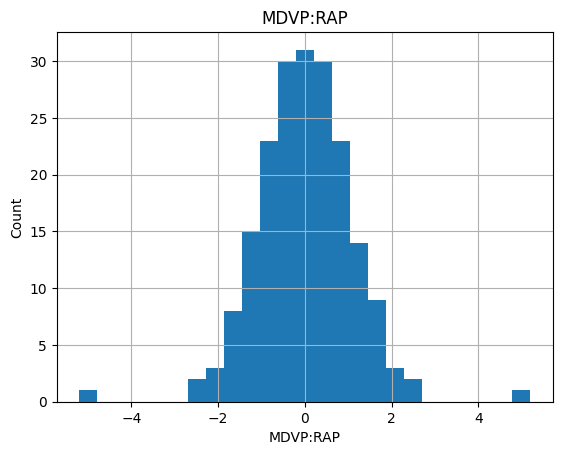

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


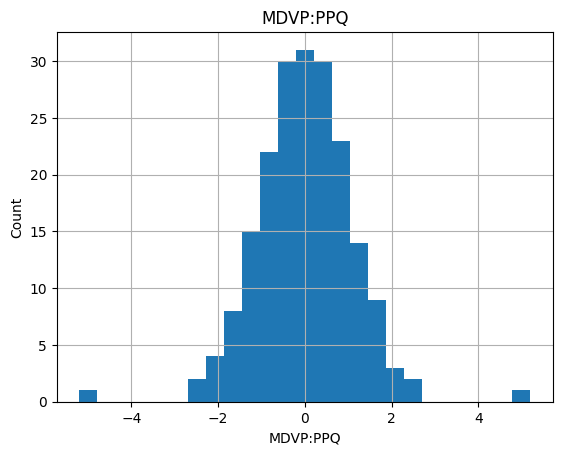

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


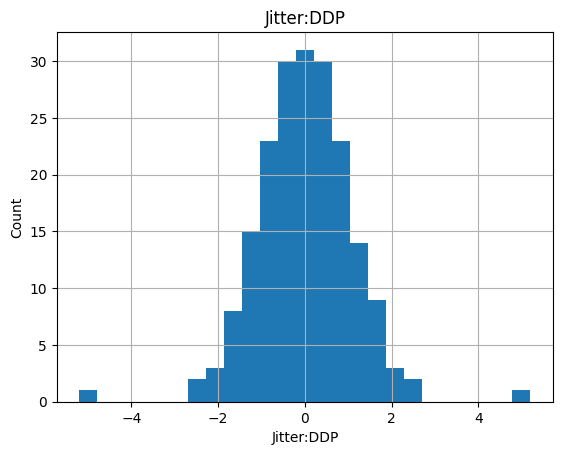

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


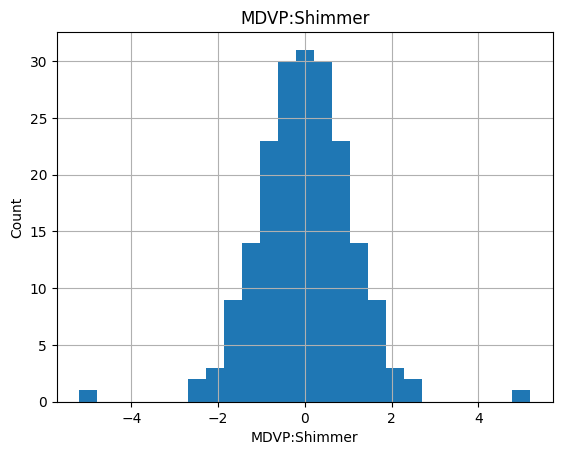

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


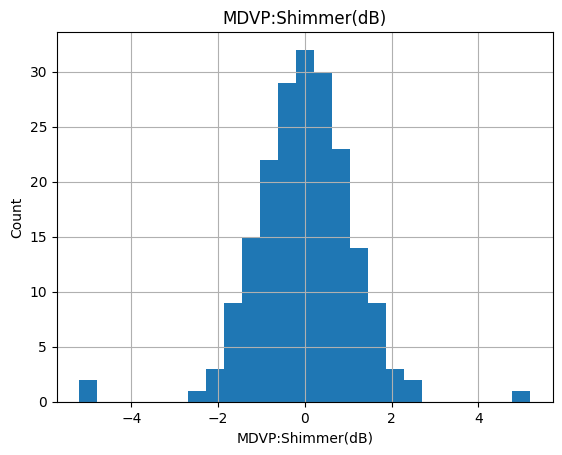

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


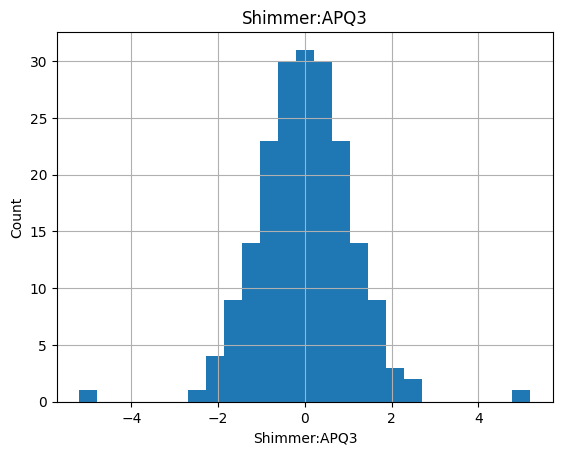

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


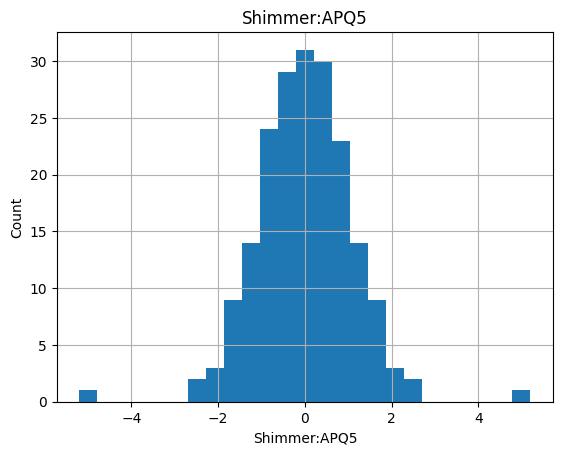

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


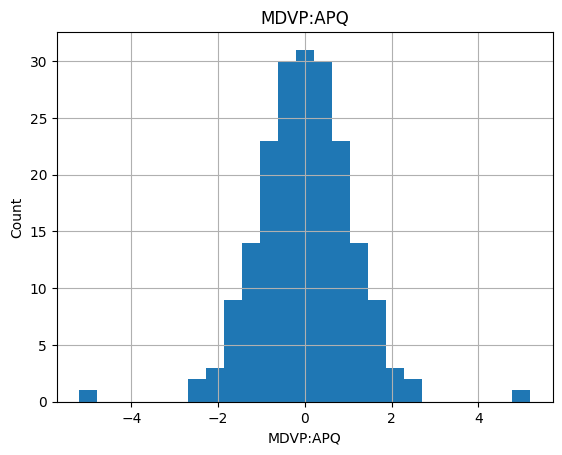

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


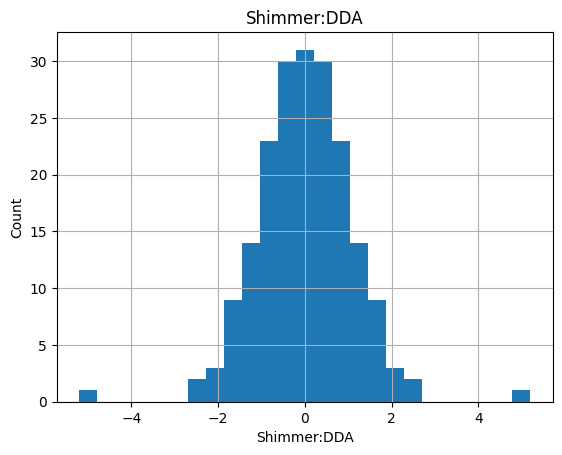

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


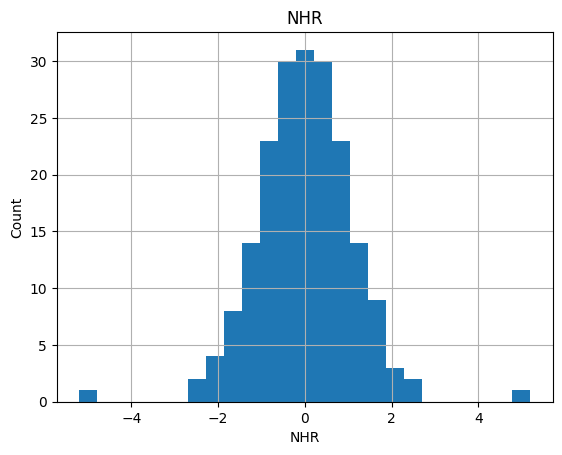

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


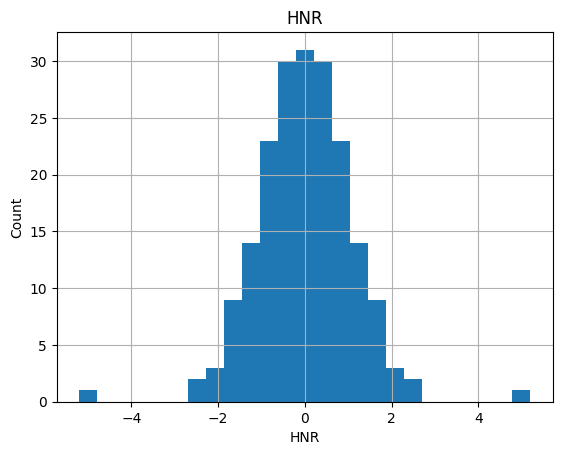

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


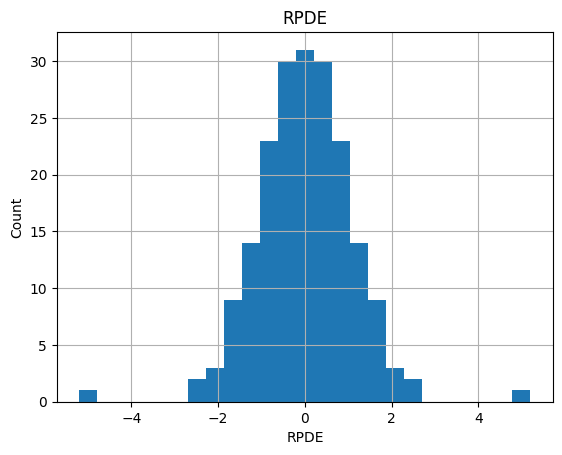

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


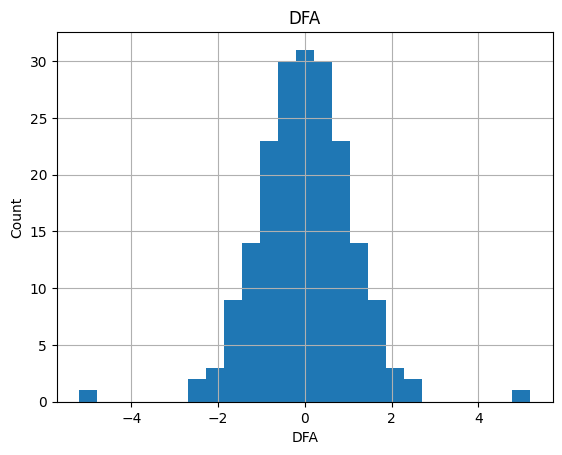

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


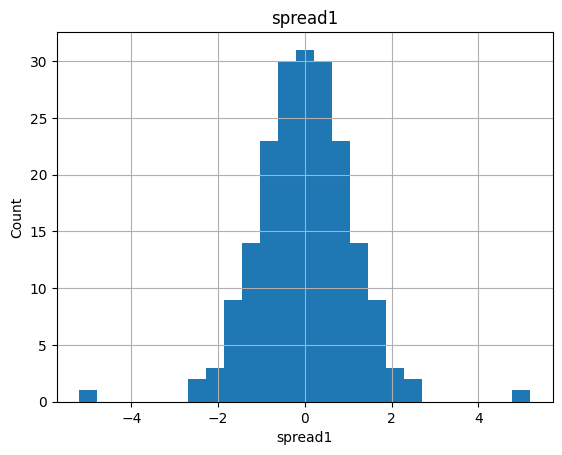

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


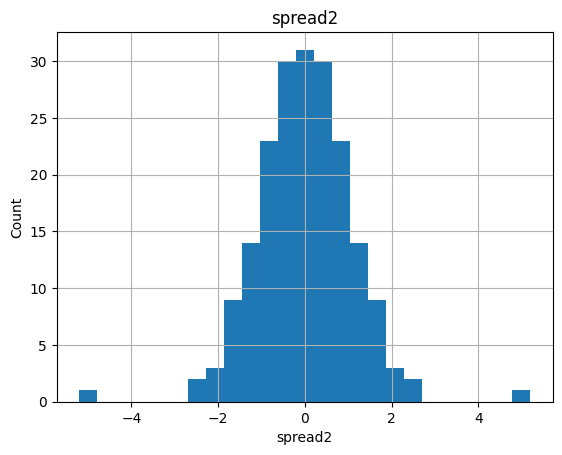

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


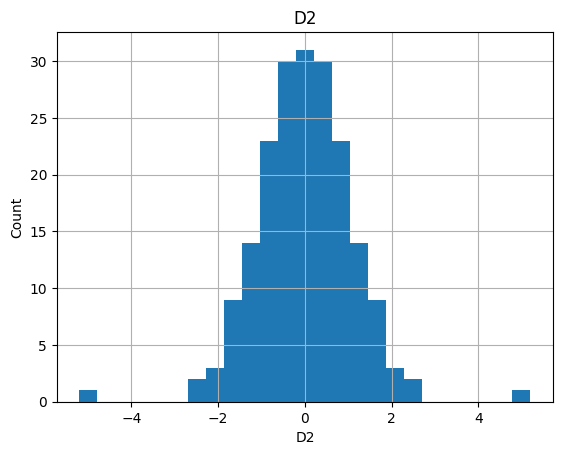

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (195). n_quantiles is set to n_samples.
  warnings.warn(


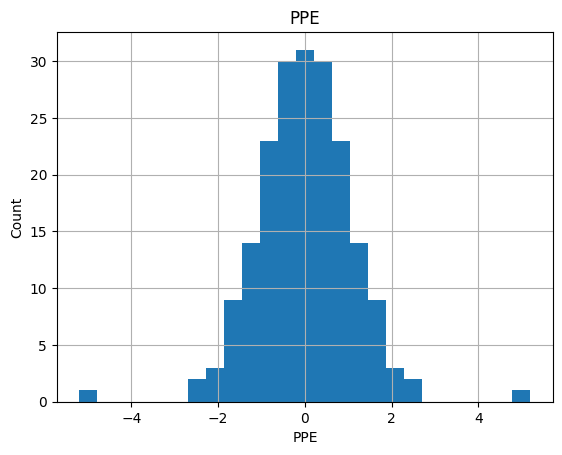

In [12]:
qt = QuantileTransformer(output_distribution='normal')
for feature in df.columns:
    if feature in ['name', 'status']:
        pass
    else:
        df[feature] = qt.fit_transform(df[[feature]])
        df[feature].hist(bins=25)
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

In [13]:
with open('E:\Multiple Disease Prediction\Saved Quantile Transformer\parkinson_quantile.pkl', 'wb') as file:
    pickle.dump(qt, file)

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21764\3835561956.py:1: SyntaxWarning: invalid escape sequence '\M'
  with open('E:\Multiple Disease Prediction\Saved Quantile Transformer\parkinson_quantile.pkl', 'wb') as file:


##### 3.5 Outliers

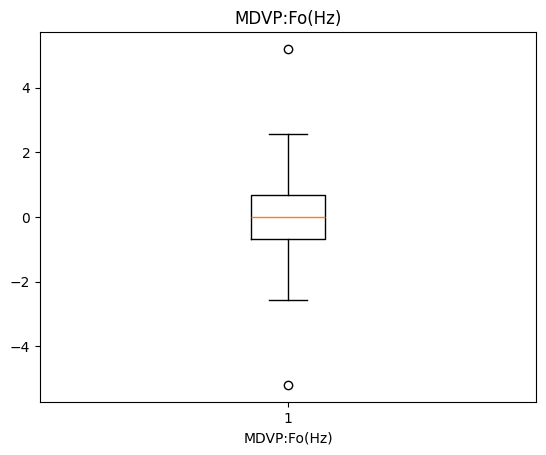

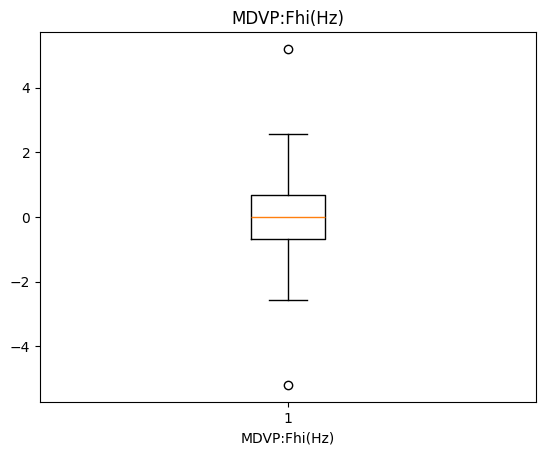

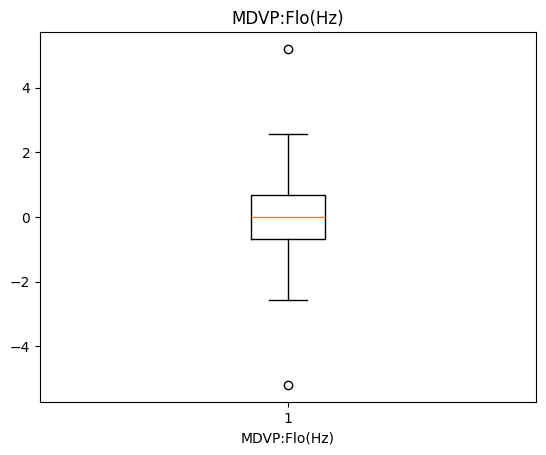

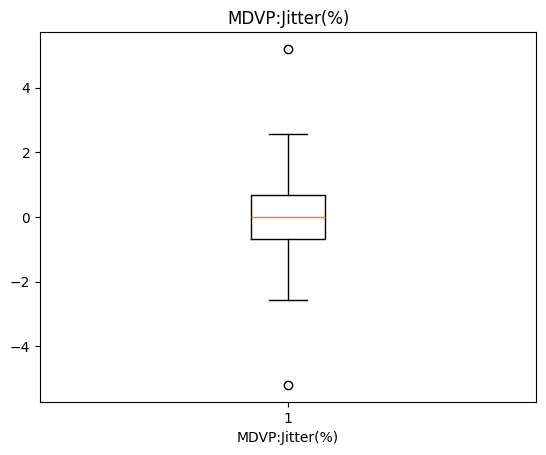

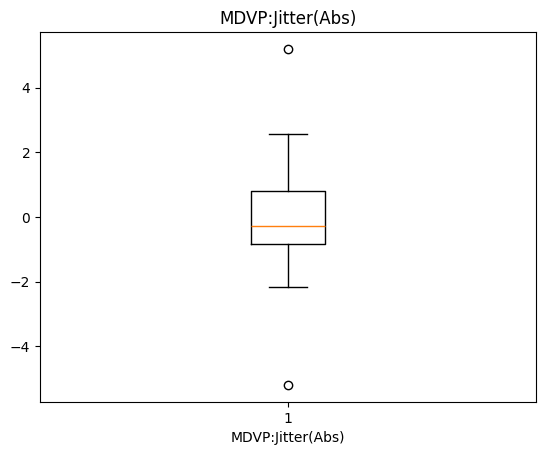

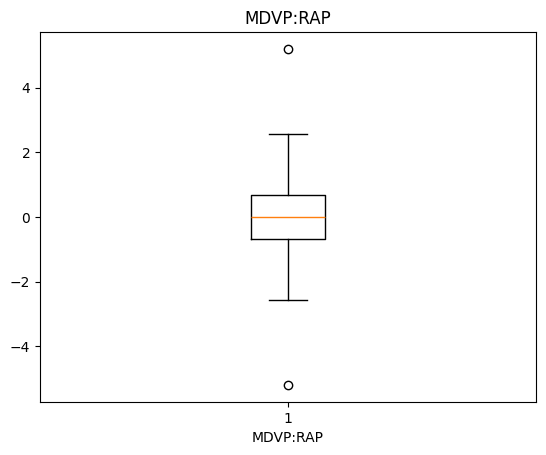

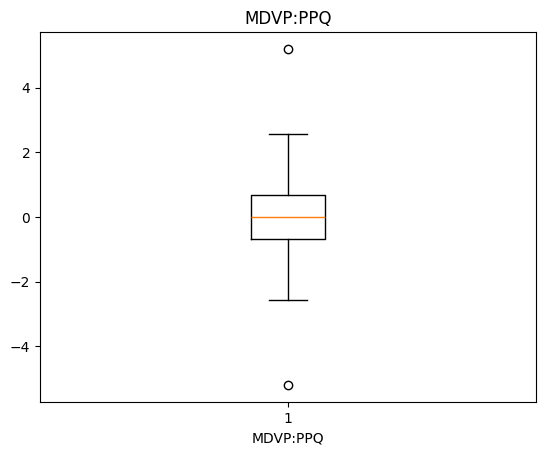

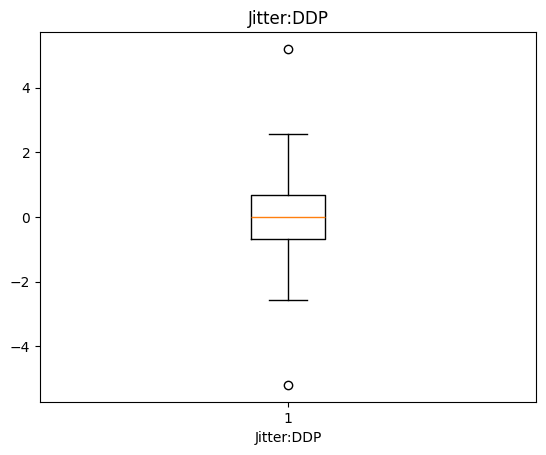

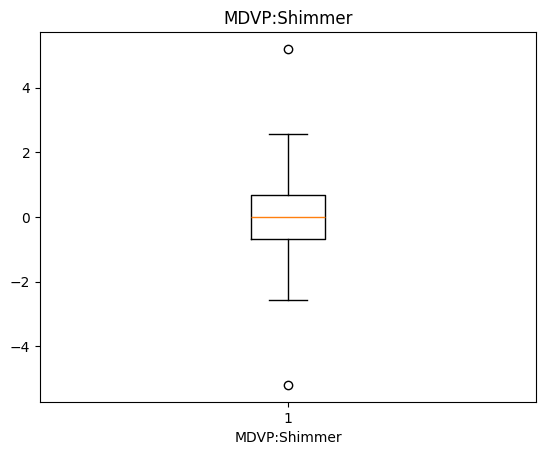

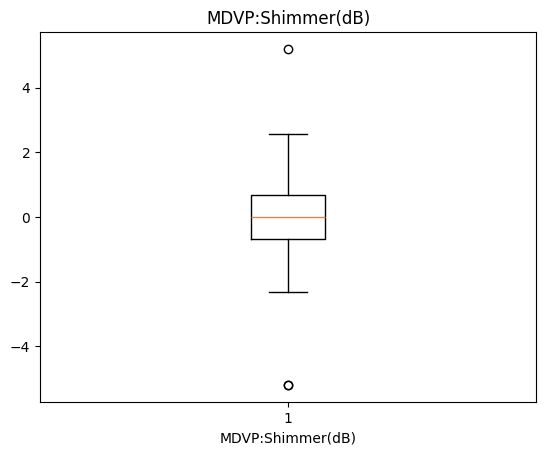

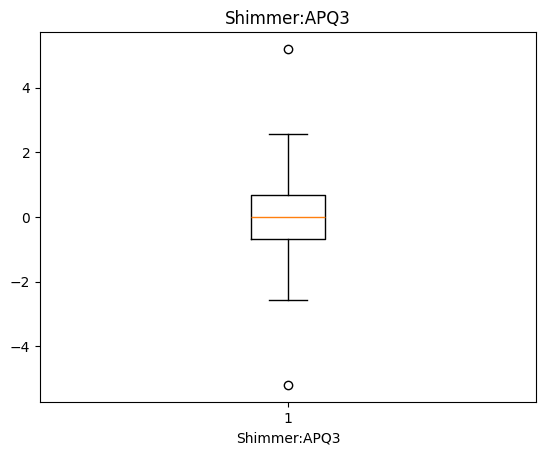

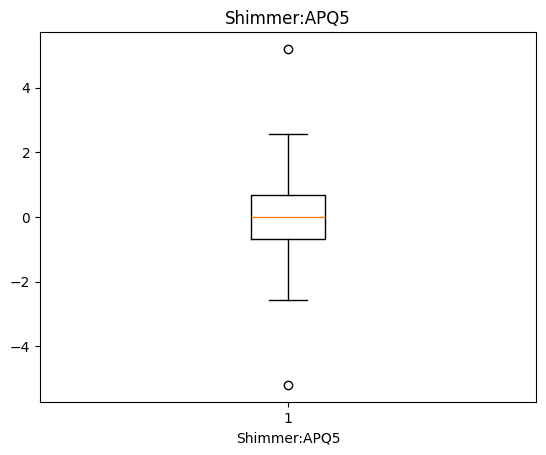

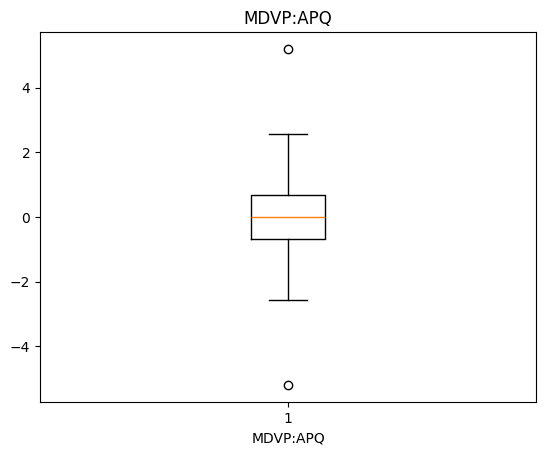

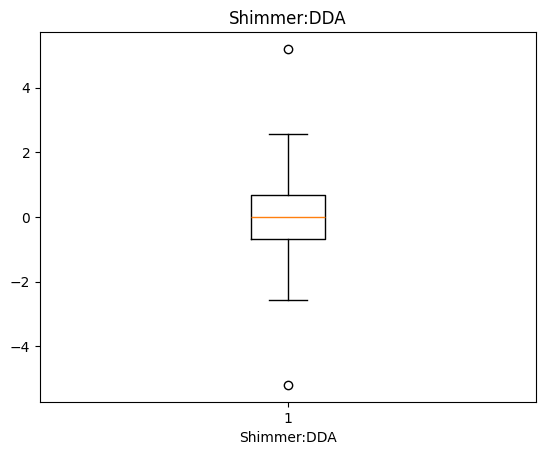

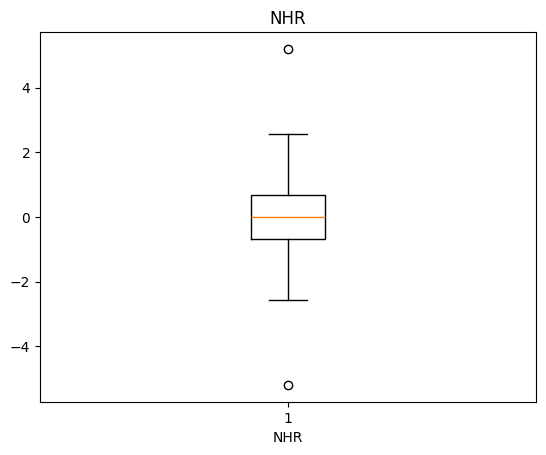

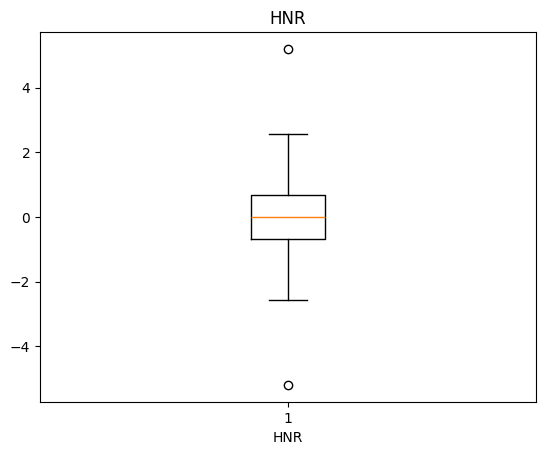

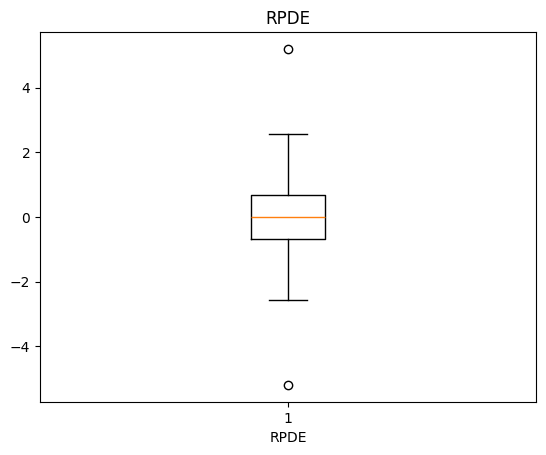

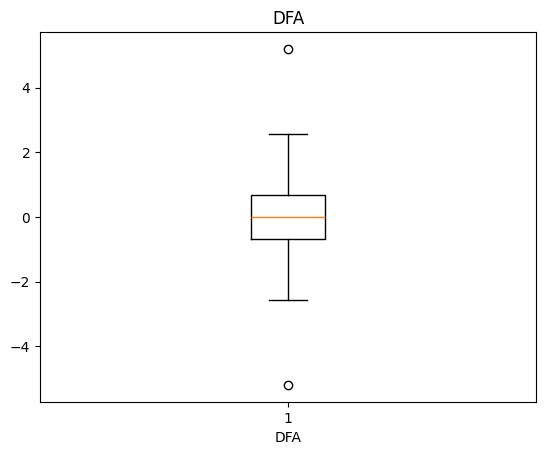

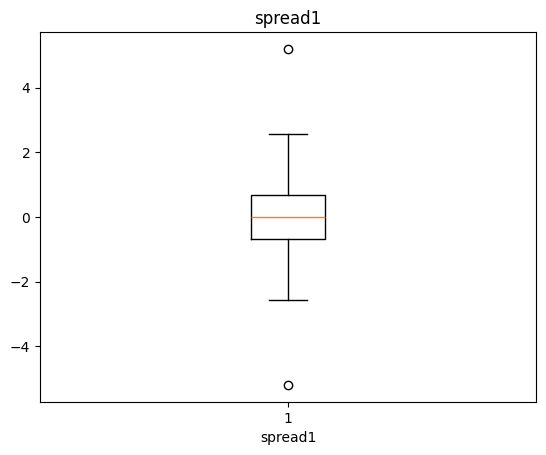

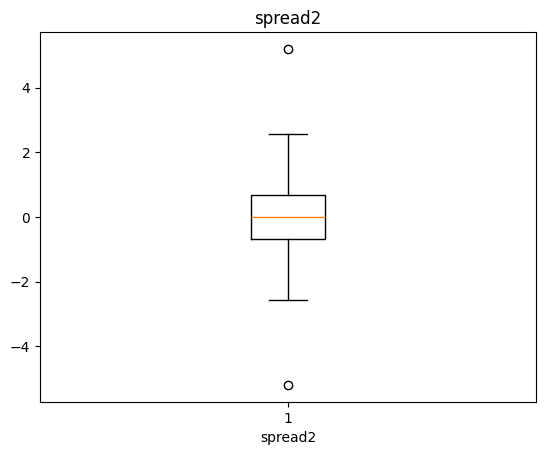

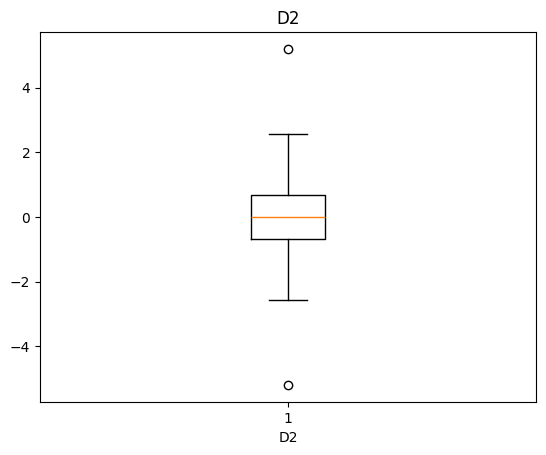

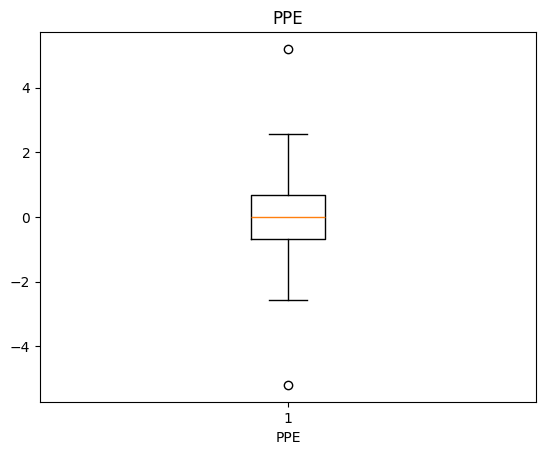

In [14]:
for feature in df.columns:
    if feature not in ['name', 'status']:
        plt.boxplot(x = feature, data = df)
        plt.title(feature)
        plt.xlabel(feature)
        plt.show()

##### 3.7 Correlation

<Axes: >

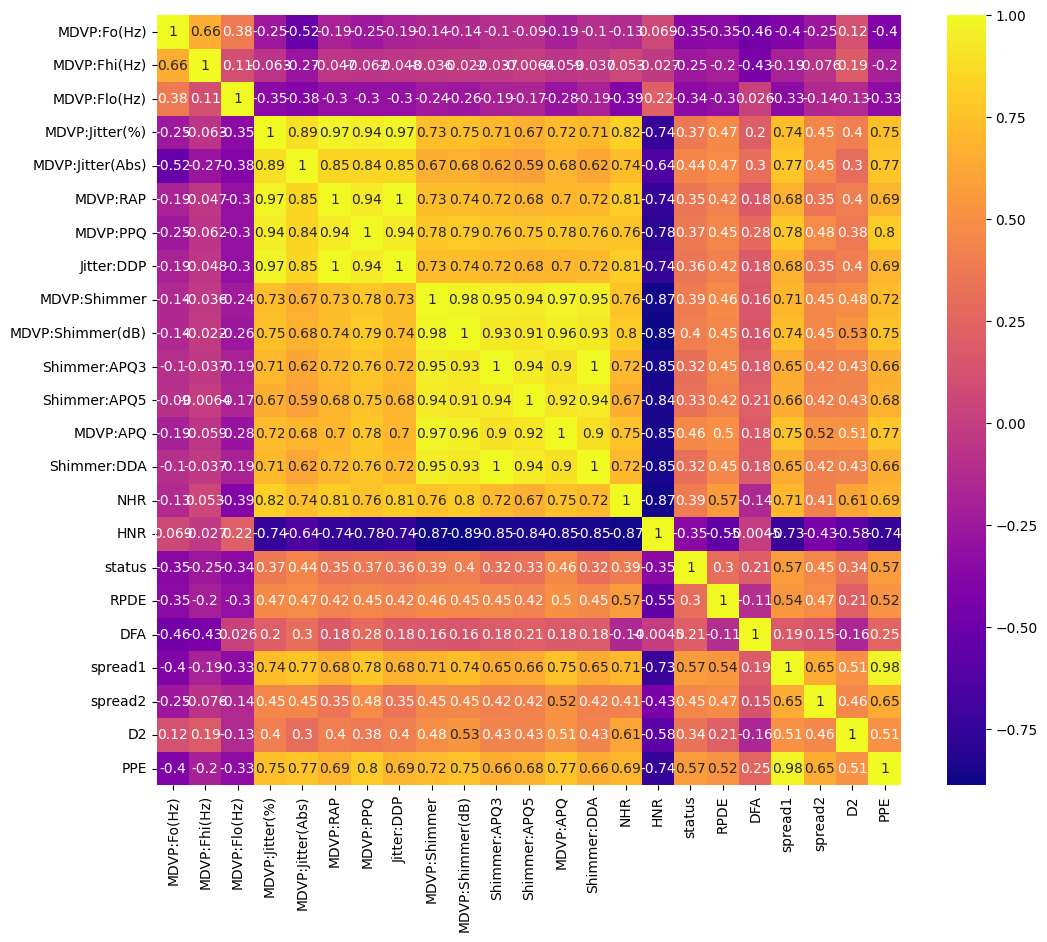

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.drop(['name'], axis=1).corr(),annot=True,cmap=plt.cm.plasma)

### 4. Data Preparation for Model Training

##### 4.1 Data Standardization

In [16]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,-0.572460,-0.328851,-1.423335,0.884755,1.027630,0.595444,1.235902,0.595444,0.933590,...,0.784086,0.572460,-0.288197,1,-0.749413,1.583085,0.819728,0.587749,-0.168768,0.995306
1,phon_R01_S01_2,-0.426007,-0.411900,0.411900,1.195328,1.235902,1.038647,1.388620,1.038647,1.423335,...,1.323807,0.483324,-0.715619,1,-0.315243,2.041138,1.459855,1.235902,0.383929,1.583085
2,phon_R01_S01_3,-0.766634,-0.856443,0.342521,1.355502,1.459855,1.293390,1.539381,1.293390,1.131768,...,1.182233,0.103551,-0.370057,1,-0.603176,5.199338,1.084032,0.995306,-0.064649,1.264124
3,phon_R01_S01_4,-0.784086,-0.618748,0.328851,1.293390,1.459855,1.169337,1.423335,1.156632,1.235902,...,1.264124,0.155676,-0.383929,1,-0.527368,1.946903,1.388620,1.182233,0.103551,1.630041
4,phon_R01_S01_5,-0.894351,-0.483324,0.301692,1.459855,1.766455,1.459855,1.630041,1.459855,1.498434,...,1.539381,0.274754,-0.557304,1,-0.715619,2.314897,1.630041,0.181889,-0.077602,1.867329


In [17]:
feature_scale = [feature for feature in df.columns if feature not in ['name', 'status']]

In [18]:
sc = StandardScaler()
sc.fit(df[feature_scale])

StandardScaler()

In [19]:
# Save the scaler to a file
with open('E:\Multiple Disease Prediction\Saved Scalers\parkinson_scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21764\174438464.py:2: SyntaxWarning: invalid escape sequence '\M'
  with open('E:\Multiple Disease Prediction\Saved Scalers\parkinson_scaler.pkl', 'wb') as file:


In [20]:
# transform the dataset and add the Id and SalePrice columns
df = pd.concat([df[['name','status']].reset_index(drop=True), pd.DataFrame(sc.transform(df[feature_scale]), columns = feature_scale)], axis = 1)

In [21]:
df.head()

,name,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,1,-0.518012,-0.297573,-1.287957,0.800494,0.937630,0.538441,1.118120,0.538733,...,0.632503,0.709514,0.517966,-0.260786,-0.678134,1.432513,0.741761,0.531846,-0.152716,0.900639
1,phon_R01_S01_2,1,-0.385488,-0.372723,0.372723,1.081546,1.129084,0.939533,1.256324,0.939775,...,1.093705,1.197911,0.437301,-0.647554,-0.285259,1.847000,1.321004,1.118352,0.347413,1.432513
2,phon_R01_S01_3,1,-0.693718,-0.774985,0.309943,1.226495,1.334953,1.170072,1.392758,1.170286,...,0.826873,1.069800,0.093622,-0.334860,-0.545806,4.704814,0.980927,0.900639,-0.058500,1.143889
3,phon_R01_S01_4,1,-0.709509,-0.559897,0.297573,1.170287,1.334953,1.057806,1.287740,1.046537,...,0.910287,1.143903,0.140793,-0.347413,-0.477208,1.761727,1.256544,1.069787,0.093702,1.475003
4,phon_R01_S01_5,1,-0.809287,-0.437353,0.272998,1.320929,1.616796,1.320721,1.474802,1.320916,...,1.226624,1.392985,0.248554,-0.504297,-0.647554,2.094721,1.475003,0.164589,-0.070221,1.689722


##### 4.3 Train-Test Split

In [22]:
X = df.drop(['name', 'status'], axis=1)
y = df['status']

In [23]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.518012,-0.297573,-1.287957,0.800494,0.937630,0.538441,1.118120,0.538733,0.844824,0.822392,...,0.632503,0.709514,0.517966,-0.260786,-0.678134,1.432513,0.741761,0.531846,-0.152716,0.900639
1,-0.385488,-0.372723,0.372723,1.081546,1.129084,0.939533,1.256324,0.939775,1.287959,1.312956,...,1.093705,1.197911,0.437301,-0.647554,-0.285259,1.847000,1.321004,1.118352,0.347413,1.432513
2,-0.693718,-0.774985,0.309943,1.226495,1.334953,1.170072,1.392758,1.170286,1.024141,1.016103,...,0.826873,1.069800,0.093622,-0.334860,-0.545806,4.704814,0.980927,0.900639,-0.058500,1.143889
3,-0.709509,-0.559897,0.297573,1.170287,1.334953,1.057806,1.287740,1.046537,1.118365,1.097096,...,0.910287,1.143903,0.140793,-0.347413,-0.477208,1.761727,1.256544,1.069787,0.093702,1.475003
4,-0.809287,-0.437353,0.272998,1.320929,1.616796,1.320721,1.474802,1.320916,1.355911,1.232474,...,1.226624,1.392985,0.248554,-0.504297,-0.647554,2.094721,1.475003,0.164589,-0.070221,1.689722


In [24]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

### 5. Model Training

##### 5.1 Logistic Regression

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict =  lr.predict(X_test)
lr_score = accuracy_score(lr_predict, y_test)
print(lr_score)

0.8974358974358975


##### 5.2 Decision Tree Classifier

In [27]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)
DT_acc = accuracy_score(y_test, DT_pred)
DT_acc

0.8974358974358975

##### 5.3 SVM Classifier

In [28]:
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [29]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [30]:
grid_search.best_score_

0.8975806451612904

In [31]:
svc = SVC(C=10, gamma = 0.1, probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
svc_acc

0.9487179487179487

##### 5.4 K-Nearest Neighbour

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_score = accuracy_score(y_test, y_pred)
knn_score

0.9487179487179487

##### 5.5 Gradient Boosting Classifier

In [33]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


c:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_const

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [34]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 150}

In [35]:
grid_search_gbc.best_score_

0.9291666666666668

In [36]:
gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 100)
gbc.fit(X_train, y_train)
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
gbc_acc = accuracy_score(y_test, y_pred)
gbc_acc

0.9230769230769231

##### 5.6 XG Boost Classifier

In [37]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_acc

0.9230769230769231

##### 5.7 Random Forest Classifier

In [38]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)
rand_acc = accuracy_score(y_test, y_pred)
rand_acc

0.9487179487179487

##### 5.8 Gaussian Naive Bayes

In [39]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_accuracy

0.7692307692307693

##### 5.9 MLP Classifier

In [40]:
mlp  = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_accuracy

c:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8974358974358975

### 6. Model Comparison

In [41]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN Classifier', 'SVM Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost Classifier', 'GaussianNB Classifier', 'MLP Classifier'],
    'Score': [100*round(lr_score,4), 100*round(knn_score,4), 100*round(svc_acc,4), 100*round(DT_acc,4), 100*round(rand_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4), 100*round(gnb_accuracy,4), 100*round(mlp_accuracy,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,KNN Classifier,94.87
2,SVM Classifier,94.87
4,Random Forest Classifier,94.87
5,Gradient Boosting Classifier,92.31
6,XgBoost Classifier,92.31
0,Logistic Regression,89.74
3,Decision Tree Classifier,89.74
8,MLP Classifier,89.74
7,GaussianNB Classifier,76.92


### 7. Selecting the Model

In [42]:
model = svc
model_predict =  model.predict(X_test)
model_score = accuracy_score(model_predict, y_test)
print(model_score)

0.9487179487179487


### 8. Saving the Model

In [43]:
filename = 'E:\Multiple Disease Prediction\Saved Models\parkinson_disease_model.sav'
pickle.dump(model,open(filename,'wb'))

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21764\1869141252.py:1: SyntaxWarning: invalid escape sequence '\M'
  filename = 'E:\Multiple Disease Prediction\Saved Models\parkinson_disease_model.sav'
